Starting Multi-Agent Rescue Simulation...


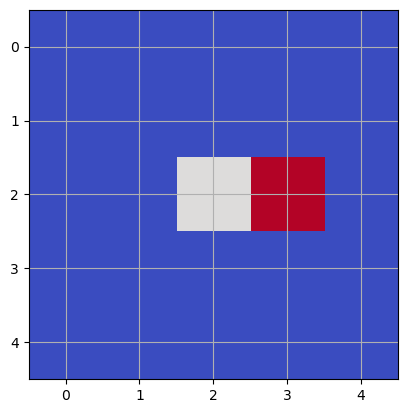

{'agent_1': [2, 2], 'agent_2': [3, 2]}
--------------------------------------


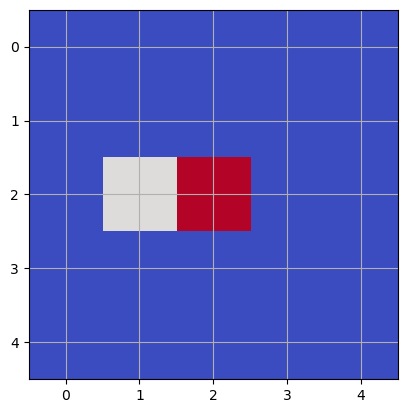

{'agent_1': [1, 2], 'agent_2': [2, 2]}
--------------------------------------


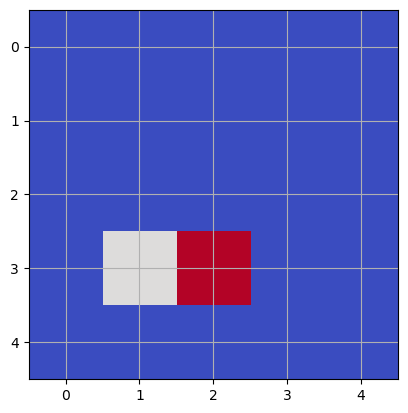

{'agent_1': [1, 3], 'agent_2': [2, 3]}
--------------------------------------


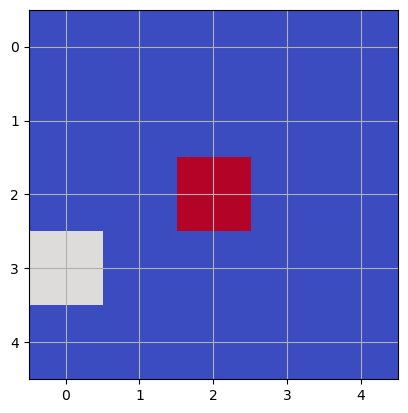

{'agent_1': [0, 3], 'agent_2': [2, 2]}
--------------------------------------


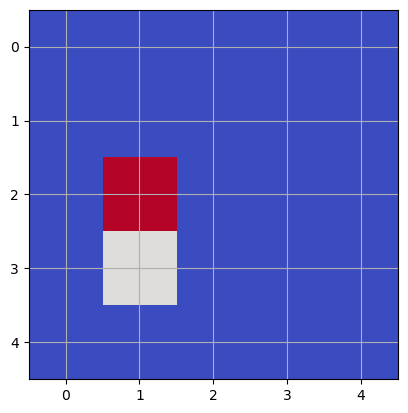

{'agent_1': [1, 3], 'agent_2': [1, 2]}
--------------------------------------
End


<Figure size 640x480 with 0 Axes>

In [11]:
import numpy as np
import random
import matplotlib.pyplot as plt
from pettingzoo.utils.env import AECEnv
from gym import spaces

class RescueEnv(AECEnv):
    metadata = {"render_modes": ["human"], "name": "rescue_v0"}

    def __init__(self, grid_size=5, max_steps=50):
        super().__init__()
        self.grid_size = grid_size
        self.max_steps = max_steps
        self.current_step = 0
        self.agents = ["agent_1", "agent_2"]
        self.pos = {agent: [random.randint(0, grid_size-1), random.randint(0, grid_size-1)] for agent in self.agents}
        self.observation_spaces = {agent: spaces.Discrete(grid_size * grid_size) for agent in self.agents}
        self.action_spaces = {agent: spaces.Discrete(4) for agent in self.agents}  # 4 directions
        self.render_mode = "human"

    def reset(self, seed=None, options=None):
        self.current_step = 0
        self.pos = {agent: [random.randint(0, self.grid_size-1), random.randint(0, self.grid_size-1)] for agent in self.agents}
        self.rewards = {agent: 0 for agent in self.agents}
        self.terminations = {agent: False for agent in self.agents}
        return {agent: self._get_obs(agent) for agent in self.agents}

    def step(self, actions):
        for agent, action in actions.items():
            if action == 0:  # UP
                self.pos[agent][1] = max(0, self.pos[agent][1] - 1)
            elif action == 1:  # DOWN
                self.pos[agent][1] = min(self.grid_size - 1, self.pos[agent][1] + 1)
            elif action == 2:  # LEFT
                self.pos[agent][0] = max(0, self.pos[agent][0] - 1)
            elif action == 3:  # RIGHT
                self.pos[agent][0] = min(self.grid_size - 1, self.pos[agent][0] + 1)
            self.rewards[agent] = -1  # Small penalty for movement
        self.current_step += 1
        terminated = self.current_step >= self.max_steps
        self.terminations = {agent: terminated for agent in self.agents}
        return {agent: self._get_obs(agent) for agent in self.agents}, self.rewards, self.terminations, {}

    def _get_obs(self, agent):
        return self.pos[agent][0] * self.grid_size + self.pos[agent][1]

    def render(self):
        grid = np.zeros((self.grid_size, self.grid_size))
        for i, agent in enumerate(self.agents):
            x, y = self.pos[agent]
            grid[y, x] = i + 1  # Different values for each agent

        plt.imshow(grid, cmap="coolwarm", origin="upper")
        plt.xticks(range(self.grid_size))
        plt.yticks(range(self.grid_size))
        plt.grid(True)
        plt.show(block=False)
        plt.pause(0.5)
        plt.clf()
        print(self.pos)

# Running the simulation
env = RescueEnv(grid_size=5)
env.reset()
print("Starting Multi-Agent Rescue Simulation...")
for _ in range(5):
    actions = {agent: np.random.choice(4) for agent in env.agents}
    obs, rewards, terminations, _ = env.step(actions)
    env.render()
    print('--------------------------------------')
print("End")